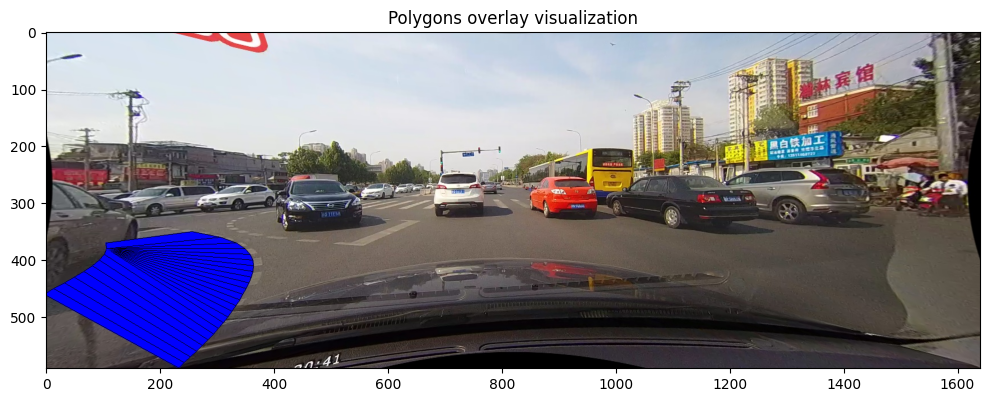

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = r"..\..\visualization_resources\polygon_example.jpg"
img_poly = cv.imread(img_path)
assert img_poly is not None, "Image file could not be read"

coordinates_file = r"..\..\visualization_resources\polygon_example.lines.txt"

lines = []

polygons = []

with open(coordinates_file, 'r') as file:
    lines = [list(map(int, map(float, line.split()))) for line in file]

r, g, b = 255, 255, 255

line_id = 0

lane_id = 0

coords_first_id = 0

coords_second_id = 0

polygon_id = 0

mask_coords = []

color_list = ((255,0,0),(0,255,0),(0,0,255))

color_id = 0

while line_id != len(lines) - 1:
    coords_first_id = 0
    coords_second_id = 0
    
    if lane_id >= len(mask_coords):
          mask_coords.append([])

    while coords_first_id + 4 <= len(lines[line_id]) or coords_second_id + 4 <= len(lines[line_id + 1]):
       x1, y1 = lines[line_id][coords_first_id], lines[line_id][coords_first_id + 1]
       x2, y2 = lines[line_id][coords_first_id + 2], lines[line_id][coords_first_id + 3]
       x3, y3 = lines[line_id + 1][coords_second_id], lines[line_id + 1][coords_second_id + 1]
       x4, y4 = lines[line_id + 1][coords_second_id + 2], lines[line_id + 1][coords_second_id + 3]

       cv.fillPoly(img_poly, [np.array([[x1, y1], [x2, y2], [x4, y4], [x3, y3]])], lineType = cv.LINE_AA, color = color_list[color_id])

       mask_coords[lane_id].append([[x1, y1], [x2, y2], [x4, y4], [x3, y3]])

       cv.polylines(img_poly, [np.array([[x1, y1], [x2, y2], [x4, y4], [x3, y3]])], isClosed = True, color = (0, 0, 0))

       if coords_first_id + 4 < len(lines[line_id]):
            coords_first_id += 2
       
       if coords_second_id + 4 < len(lines[line_id + 1]):
            coords_second_id += 2

       if coords_first_id + 4 == len(lines[line_id]) and coords_second_id + 4 == len(lines[line_id + 1]):
            x1, y1 = lines[line_id][coords_first_id], lines[line_id][coords_first_id + 1]
            x2, y2 = lines[line_id][coords_first_id + 2], lines[line_id][coords_first_id + 3]
            x3, y3 = lines[line_id + 1][coords_second_id], lines[line_id + 1][coords_second_id + 1]
            x4, y4 = lines[line_id + 1][coords_second_id + 2], lines[line_id + 1][coords_second_id + 3]

            mask_coords[lane_id].append([[x1, y1], [x2, y2], [x4, y4], [x3, y3]])

            cv.fillPoly(img_poly, [np.array([[x1, y1], [x2, y2], [x4, y4], [x3, y3]])], lineType = cv.LINE_AA, color = color_list[color_id])

            cv.polylines(img_poly, [np.array([[x1, y1], [x2, y2], [x4, y4], [x3, y3]])], isClosed = True, color = (0, 0, 0))

            break

    line_id += 1

    lane_id += 1

    color_id += 1

img_poly = cv.cvtColor(img_poly, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))

plt.subplot()
plt.title('Polygons overlay visualization')
plt.imshow(img_poly)

plt.tight_layout()
plt.show()

